# Telecom Churn Prediction

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. Given the fact that it costs times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

**Goal:** Build a machine learning model that is able to predict churning customers based on the features provided for their usage.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### Import libraries and read file

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing feature engineering and Machine Learning libraries

# Import Sklearn model split
from sklearn.model_selection import train_test_split
# Import Sklearn model scaler
from sklearn.preprocessing import StandardScaler
# Import class imbalancing library using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import DistanceMetric
# Import Power Transform of numeric columns for skewness removal
from sklearn.preprocessing import PowerTransformer
#Importing the PCA module
from sklearn.decomposition import PCA
# Import time
import time
# Import Random Forest classifier for feature importance
from sklearn.ensemble import RandomForestClassifier
# Import Logistic regression model library and score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, auc
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import RFE
import statsmodels.api as stm
# Importing SVC
from sklearn.svm import SVC
# Importing Random Forest Classifier
from xgboost import XGBClassifier
# Import VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Columns and row display
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
# Reading the dataset
# Reading the training dataset to train and test the model 
tc = pd.read_csv("C:\\Users\\saifr\\Documents\\Python Data files\\train.csv", encoding='UTF-8')
# Reading the test dataset to validate the model
tc_test_final = pd.read_csv("C:\\Users\\saifr\\Documents\\Python Data files\\test.csv", encoding='UTF-8')

For the moment we will use the train dataset to both train and test the model. The test dataset will be used after the model is created and tested as a validation dataset

In [3]:
# Let's have a look at the rows and columns of the train dataset
print('Number of rows and columns in the train dataset: ', tc.shape)
# Let's have a look at the rows and columns of the test dataset
print('Number of rows and columns in the train dataset: ', tc_test_final.shape)

Number of rows and columns in the train dataset:  (69999, 172)
Number of rows and columns in the train dataset:  (30000, 171)


In [4]:
# Let's have a look at the train dataset
tc.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
# Let's have a look at the column types
tc_test_final['night_pck_user_6'].dtypes

dtype('float64')

In [6]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


We can see there are 135 float value, 28 integer and 9 object type columns

## Data analysis and Pre-processing:

As part of the preprocessing, we will check for values in the columns, if there are any missing values present and what needs to be done if there are missing values in the dataset.

In [7]:
# Let's have a look at the date information of these object type columns
tc.date_of_last_rech_6.value_counts().head(3)

6/30/2014    11880
6/29/2014     9049
6/27/2014     7800
Name: date_of_last_rech_6, dtype: int64

In [8]:
# Let's have a look at the date information of these object type columns
tc.date_of_last_rech_7.value_counts().head(3)

7/31/2014    12206
7/30/2014     9716
7/25/2014     6577
Name: date_of_last_rech_7, dtype: int64

In [9]:
# Let's have a look at the date information of these object type columns
tc.date_of_last_rech_8.value_counts().head(3)

8/31/2014    10324
8/30/2014     8187
8/29/2014     6995
Name: date_of_last_rech_8, dtype: int64

In [10]:
# Let's have a look at the date information of these object type columns
tc.date_of_last_rech_data_6.value_counts().head(3)

6/30/2014    1317
6/29/2014    1148
6/28/2014    1126
Name: date_of_last_rech_data_6, dtype: int64

In [11]:
# Let's have a look at the date information of these object type columns
tc.date_of_last_rech_data_6.value_counts().head(3)

6/30/2014    1317
6/29/2014    1148
6/28/2014    1126
Name: date_of_last_rech_data_6, dtype: int64

In [12]:
# Let's have a look at the date information of these object type columns
tc.date_of_last_rech_data_6.value_counts().head(3)

6/30/2014    1317
6/29/2014    1148
6/28/2014    1126
Name: date_of_last_rech_data_6, dtype: int64

We can see there are 6 categorical columns in the dataset for three months - June, July and August
- night_pck_user_6
- night_pck_user_7
- night_pck_user_8

- fb_user_6
- fb_user_7
- fb_user_8

In [13]:
# Let's look at the data in these columns - June
tc['night_pck_user_6'].value_counts()

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [14]:
#Let's look at the data in these columns - July
tc['night_pck_user_7'].value_counts()

0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64

In [15]:
#Let's look at the data in these columns - June
tc['fb_user_6'].value_counts()

1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64

In [16]:
#Let's look at the data in these columns - July
tc['fb_user_7'].value_counts()

1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64

In [17]:
# Let's have a look at the missing values of the categorical columns
tc[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].isnull().sum()/len(tc)*100

night_pck_user_6    74.902499
night_pck_user_7    74.478207
night_pck_user_8    73.689624
fb_user_6           74.902499
fb_user_7           74.478207
fb_user_8           73.689624
dtype: float64

We can see in the Night pack user, there are a lot of missing values. These are users who do not avail the service and thus the data is blank. We can impute these missing values with 0 since there is no service availed

For the categorical columns, we are going to create dummy variables and drop the original columns for further processing. 

#### Missing value treatment:

In [18]:
# Now, Let's have a look at the null values in the dataset
round(tc.isnull().sum().head(173)/len(tc)*100,2)

id                   0.0
circle_id            0.0
loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 172, dtype: float64

In [19]:
# Storing the categorical variables in a list
cat_vars = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

We can see there are 9 object type columns:
- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8

- date_of_last_rech_6
- date_of_last_rech_7
- date_of_last_rech_8

- date_of_last_rech_data_6
- date_of_last_rech_data_7
- date_of_last_rech_data_8

We can see all these columns are of the date.

In [20]:
# Let's have a look at the date information of these object type columns
print('Value of last date of June: ', tc.last_date_of_month_6.values[0])
print('Value of last date of June: ', tc.last_date_of_month_7.values[0])
print('Value of last date of June: ', tc.last_date_of_month_8.values[0])

Value of last date of June:  6/30/2014
Value of last date of June:  7/31/2014
Value of last date of June:  8/31/2014


In [21]:
# Let's impute the last_date_of_month_* with the only value for the column
def impute_last_date_of_month(df):
    df.last_date_of_month_6 = df.last_date_of_month_6.fillna('6/30/2014')
    df.last_date_of_month_7 = df.last_date_of_month_7.fillna('7/31/2014')
    df.last_date_of_month_8 = df.last_date_of_month_8.fillna('8/31/2014')

In [22]:
# Using the function impute_last_date_of_month on the training set to impute missing value
impute_last_date_of_month(tc)

In [23]:
# The missing values for Minutes of usage voice calls(mou) are the ones where there were no recorded minutes. So these can be imputed with 0.
cols = tc.columns
col_mou_bool = cols.str.contains('mou')
# Storing the columns of mou in a list
col_mou = cols[col_mou_bool]

In [24]:
# For the date column for last recharge, we are extracting the day since we already know the month and year are constant.
# Creating a new field day_date_of_last_rech_* from the last recharge date column
def last_recharge_date_extract(df):
    
    df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
    df['day_date_of_last_rech_6'] = df['date_of_last_rech_6'].dt.day
    df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
    df['day_date_of_last_rech_7'] = df['date_of_last_rech_7'].dt.day
    df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])
    df['day_date_of_last_rech_8'] = df['date_of_last_rech_8'].dt.day
    
    df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
    df['day_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].dt.day
    df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
    df['day_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].dt.day
    df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])
    df['day_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].dt.day

In [25]:
# We can drop the dates from which we have extracted the day and created new feature. Adding the drop column to a list
cols_drop = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

In [26]:
# Let's store the new date values in a list
col_date_cols = ['day_date_of_last_rech_6','day_date_of_last_rech_7','day_date_of_last_rech_8','day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

Now, Let's have a look at the 3g columns.

In [27]:
tc[['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']].describe()

,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000
mean,0.602288,0.623678,0.636423,122.171882,128.934444,135.486541,90.069931,89.115767,90.618564,0.075815,0.077730,0.081958,0.075344,0.081444,0.085487,68.108597,65.935830,60.07674
std,1.279297,1.401230,1.457058,554.869965,554.096072,568.310234,193.600413,195.826990,189.907986,0.358905,0.383189,0.381821,0.573003,0.634547,0.680035,269.328659,267.899034,257.22681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.380000,-26.040000,-24.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520000,0.420000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,122.070000,120.860000,122.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,29.000000,34.000000,45.000000,45735.400000,28144.120000,30036.060000,5054.370000,4980.900000,3716.900000,9.000000,16.000000,16.000000,29.000000,33.000000,41.000000,12916.220000,9165.600000,11166.21000


For the missing values in these columns
- Count can be imputed with 0 as there is no count
- Volume can be imputed with 0 as no mb is accounted
- Average revenue per user for the missing values can also be imputed with 0 as there is not revenue by the ones not using the service
- Monthly can be imputed with 0
- Sachet can be imputed with 0

In [28]:
# Storing all the 3G columns to be imputed with 0 in a list
col_3g = ['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

Now, Let's have a look at the 2g columns.

In [29]:
tc[['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6','vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6','sachet_2g_7', 'sachet_2g_8']].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8
count,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1.865323,2.056311,2.016018,51.773924,51.240204,50.127506,86.863900,85.846074,86.348404,0.079287,0.083401,0.080930,0.388863,0.441406,0.449492
std,2.566377,2.799916,2.728246,212.513909,211.114667,213.101403,171.321203,178.067280,170.297094,0.294719,0.304802,0.299254,1.494206,1.651012,1.632450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-35.830000,-13.090000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.300000,8.800000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,122.070000,122.070000,122.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,48.000000,44.000000,10285.900000,7873.550000,11117.610000,5054.350000,4809.360000,3483.170000,4.000000,5.000000,5.000000,42.000000,48.000000,44.000000


For the missing values in these columns
- Count can be imputed with 0 as there is no count
- Volume can be imputed with 0 as no mb is accounted
- Average revenue per user for the missing values can also be imputed with 0 as there is not revenue by the ones not using the service
- Monthly can be imputed with 0
- Sachet can be imputed with 0

In [30]:
# Storing all the 2G columns to be imputed with 0 in a list
col_2g = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']

Let's have a look at the data columns in the dataframe

In [31]:
tc[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8']].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


For the missing values in these columns
- Total recharge amount can be imputed with 0 for no recharges
- Max recharge can be imputed with 0 for no recharges
- Average recharge amount for data can also be imputed with 0 for null values

In [32]:
# Storing all the data columns to be imputed with 0 in a list
col_data = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8']

In [33]:
tc[['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']].describe()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
count,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000
mean,0.462581,0.024425,0.033059,0.854063,1.019680,0.963214
std,4.768437,1.716430,2.232547,12.149144,13.225373,11.697686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,800.890000,270.240000,394.930000,1362.940000,1495.940000,1209.860000


For the missing values in these columns, we can impute with zero for no incoming or outgoing values

In [34]:
# Storing all the others columns to be imputed with 0 in a list
col_otrs = ['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']

In [35]:
# defining functions to impute missing values in columns
def cat_var_missing_val(df):
    for i in cat_vars:
        df[i] = df[i].fillna(0)
def missing_impute_mou(df):
    for i in col_mou:
        df[i] = df[i].fillna(0)
def missing_impute_3g(df):
    for i in col_3g:
        df[i] = df[i].fillna(0)
def missing_impute_2g(df):
    for i in col_2g:
        df[i] = df[i].fillna(0)
def missing_impute_data(df):
    for i in col_data:
        df[i] = df[i].fillna(0)
def missing_impute_otrs(df):
    for i in col_otrs:
        df[i] = df[i].fillna(0)
def missing_impute_date_cols(df):
    for i in col_date_cols:
        df[i] = df[i].fillna(0)

#### Categorical column transformation:

In [36]:
# Creating dummy variables for night pack and fb user - defining function
def dummy_for_cat_cars(df):
    night_pck_user_6_d = pd.get_dummies(df['night_pck_user_6'], prefix='nu6', drop_first= True)
    night_pck_user_7_d = pd.get_dummies(df['night_pck_user_7'], prefix='nu7', drop_first= True)
    night_pck_user_8_d = pd.get_dummies(df['night_pck_user_8'], prefix='nu8', drop_first= True)

    fb_user_6_d = pd.get_dummies(df['fb_user_6'], prefix='fu6', drop_first= True)
    fb_user_7_d = pd.get_dummies(df['fb_user_7'], prefix='fu7', drop_first= True)
    fb_user_8_d = pd.get_dummies(df['fb_user_8'], prefix='fu8', drop_first= True)

    df = pd.concat([df,night_pck_user_6_d], axis=1)
    df = pd.concat([df,night_pck_user_7_d], axis=1)
    df = pd.concat([df,night_pck_user_8_d], axis=1)

    df = pd.concat([df,fb_user_6_d], axis=1)
    df = pd.concat([df,fb_user_7_d], axis=1)
    df = pd.concat([df,fb_user_8_d], axis=1)

In [37]:
def data_pre_processing(df):
    # Categorical column transformation
    cat_var_missing_val(df)
    # Date(day) value extraction from Date columns in dataframe 
    last_recharge_date_extract(df)
    # Impute missing values for last date of month
    impute_last_date_of_month(df)
    # Missing value imputation for columns
    missing_impute_mou(df)
    missing_impute_3g(df)
    missing_impute_2g(df)
    missing_impute_data(df)
    missing_impute_otrs(df)
    missing_impute_date_cols(df)
    # Creating dummy variables for categorical variables
    dummy_for_cat_cars(df)

In [38]:
# Pre-processing data for the dataset
data_pre_processing(tc)

In [39]:
# Now, Lets have a look at the null values in the dataset
tc.isnull().sum().head(185)/len(tc)*100

id                         0.0
circle_id                  0.0
loc_og_t2o_mou             0.0
std_og_t2o_mou             0.0
loc_ic_t2o_mou             0.0
                          ... 
day_date_of_last_rech_7    0.0
day_date_of_last_rech_8    0.0
day_of_last_rech_data_6    0.0
day_of_last_rech_data_7    0.0
day_of_last_rech_data_8    0.0
Length: 178, dtype: float64

In [40]:
cols_drop = cols_drop + ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [41]:
cols = tc.columns

In [42]:
for j in cols:
    print(j, tc[j].nunique())

id 69999
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
arpu_6 61615
arpu_7 61425
arpu_8 60194
onnet_mou_6 20057
onnet_mou_7 20076
onnet_mou_8 19725
offnet_mou_6 26254
offnet_mou_7 26139
offnet_mou_8 25995
roam_ic_mou_6 5306
roam_ic_mou_7 4240
roam_ic_mou_8 4252
roam_og_mou_6 6568
roam_og_mou_7 5305
roam_og_mou_8 5215
loc_og_t2t_mou_6 11491
loc_og_t2t_mou_7 11359
loc_og_t2t_mou_8 11296
loc_og_t2m_mou_6 17848
loc_og_t2m_mou_7 17641
loc_og_t2m_mou_8 17616
loc_og_t2f_mou_6 3376
loc_og_t2f_mou_7 3365
loc_og_t2f_mou_8 3311
loc_og_t2c_mou_6 1945
loc_og_t2c_mou_7 2103
loc_og_t2c_mou_8 2204
loc_og_mou_6 22309
loc_og_mou_7 22012
loc_og_mou_8 21950
std_og_t2t_mou_6 14554
std_og_t2t_mou_7 14745
std_og_t2t_mou_8 14483
std_og_t2m_mou_6 16059
std_og_t2m_mou_7 16234
std_og_t2m_mou_8 15968
std_og_t2f_mou_6 2074
std_og_t2f_mou_7 1991
std_og_t2f_mou_8 1945
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_8 1
std_og_

In [43]:
# We can see there are a few more columns having only one value
print('Value for column circle_id :', tc.circle_id.values[0])
print('Value for column loc_og_t2o_mou :', tc.loc_og_t2o_mou.values[0])
print('Value for column std_og_t2o_mou :', tc.std_og_t2o_mou.values[0])
print('Value for column loc_ic_t2o_mou :', tc.loc_ic_t2o_mou.values[0])
print('Value for column std_og_t2c_mou_6 :', tc.std_og_t2c_mou_6.values[0])
print('Value for column std_og_t2c_mou_7 :', tc.std_og_t2c_mou_7.values[0])
print('Value for column std_og_t2c_mou_8 :', tc.std_og_t2c_mou_8.values[0])
print('Value for column std_ic_t2o_mou_6 :', tc.std_ic_t2o_mou_6.values[0])
print('Value for column std_ic_t2o_mou_7 :', tc.std_ic_t2o_mou_7.values[0])
print('Value for column std_ic_t2o_mou_8 :', tc.std_ic_t2o_mou_8.values[0])

Value for column circle_id : 109
Value for column loc_og_t2o_mou : 0.0
Value for column std_og_t2o_mou : 0.0
Value for column loc_ic_t2o_mou : 0.0
Value for column std_og_t2c_mou_6 : 0.0
Value for column std_og_t2c_mou_7 : 0.0
Value for column std_og_t2c_mou_8 : 0.0
Value for column std_ic_t2o_mou_6 : 0.0
Value for column std_ic_t2o_mou_7 : 0.0
Value for column std_ic_t2o_mou_8 : 0.0


In [44]:
# We can see all these columns have no data in them other than 0.00
cols_drop = cols_drop + ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [45]:
# The date columns last_date_of_month_* have only one value in them. So adding them to the list of drop columns
cols_drop = cols_drop + ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']

In [46]:
# Drop columns function defining
def drop_col(df):
    df.drop(columns=cols_drop,inplace=True)

#### Filter High-Value Customers:

In [47]:
# Deriving new column total_rech_data_amt_* by product of total_rech_data_* and av_rech_amt_data_* for Total Data Recharge Amount
def avg_data_totl(df):
    df["total_rech_data_amt_6"] = df["total_rech_data_6"] * df['av_rech_amt_data_6']
    df["total_rech_data_amt_7"] = df["total_rech_data_7"] * df['av_rech_amt_data_7']
    df["total_rech_data_amt_8"] = df["total_rech_data_8"] * df['av_rech_amt_data_8']

In [48]:
# Applying function on tc dataset
avg_data_totl(tc)

In [49]:
# Adding total_rech_data_* and av_rech_amt_data_* to the drop column list since we do not need these columns anymore
cols_drop = cols_drop + ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

In [50]:
# Dropping columns from the tc dataset
drop_col(tc)

In [51]:
# Filtering High Value customers based on total spend above 70 percentile for month of June and July
avg_amt_rchr_67 = (tc["total_rech_amt_6"] + tc["total_rech_data_amt_6"] + tc["total_rech_amt_7"] + tc["total_rech_data_amt_7"]) / 2.0
high_val_pers = np.percentile(avg_amt_rchr_67, 70.0)
tc_hvl = tc[avg_amt_rchr_67 >= high_val_pers]

In [52]:
print('Average recharge amount of 6(June) and 7(july) at 70 percentile', high_val_pers)
print('Original dataframe shape: ',tc.shape[0])
print('High value customer dataframe shape: ', tc_hvl.shape[0])

Average recharge amount of 6(June) and 7(july) at 70 percentile 477.5
Original dataframe shape:  69999
High value customer dataframe shape:  21013


In [53]:
# ID is not a related column to the prediction Churn or Not churn. Thus, changing type of ID to object
tc_hvl.id = tc_hvl.id.astype('object')

### Outlier Assessment

- Understand the data to find outliers

In [54]:
# Checking for outliers
tc_hvl.describe(percentiles=[0.05,0.25,0.5,0.75,.90,.95])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,2

In [55]:
# We can see for a few columns, the outliers are very high. We are going to restrict our model within 5% and 95% of the quartile range
cols_outlier = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8']

for c in cols_outlier: 
    Q1 = tc_hvl[c].quantile(0.05)
    Q3 = tc_hvl[c].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Assigning the filtered dataset into data
    tc_hvl_rng = tc_hvl.loc[(tc_hvl[c] > lower) & (tc_hvl[c] < upper)]

In [56]:
print('Rows before removing outlier:', tc_hvl.shape[0])
print('Rows after removing outlier:', tc_hvl_rng.shape[0])

Rows before removing outlier: 21013
Rows after removing outlier: 20780


In [57]:
print('Final shape of dataset: ', tc_hvl_rng.shape)

Final shape of dataset:  (20780, 150)


In [58]:
# Checking range for final dataset
tc_hvl_rng.describe(percentiles=[0.05,0.25,0.5,0.75,.90,.95])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,

### Exploratory Data Analysis

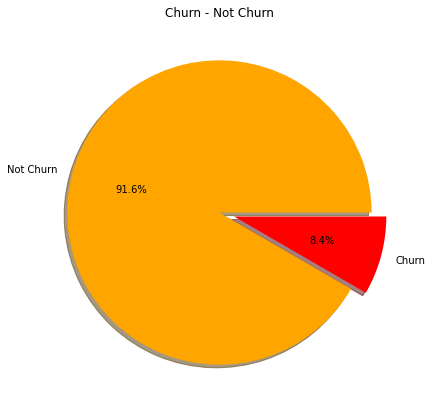

In [59]:
# Let's have a look at the percentage of churn and not churn
plt.figure(figsize=[7,7])
colors = ['orange','red']
explode = (0, 0.1) 
plt.pie(tc_hvl_rng['churn_probability'].value_counts(),labels=['Not Churn','Churn'], explode = explode, colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Churn - Not Churn')
plt.show()

**Percentage of churn: 8.4%**

We can see that the dataset is highly imbalanced for class identification for Churn / Not Churn

In [60]:
# Checking Numerical & Categorical Variables
num_cols = list(tc_hvl_rng._get_numeric_data().columns)
cat_cols = list(set(tc_hvl_rng.columns) - set(num_cols))

Let's look at the spread of data(columns) for the Churn and Not Churn 

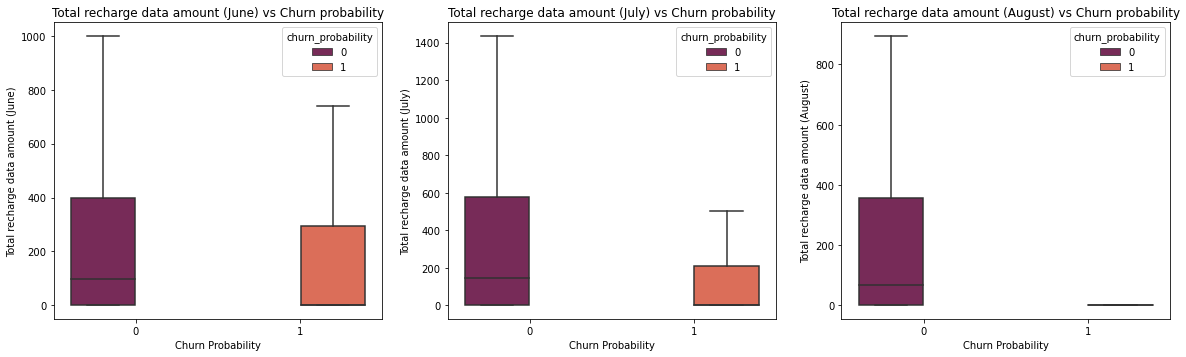

In [61]:
# Let's have a look at the spread of data using boxplot for month of June(6), July(7) and August(8)
# Total recharge data amount for June, July, August vs Churn Probability
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(data=tc_hvl_rng, y="total_rech_data_amt_6",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total recharge data amount (June) vs Churn probability')
plt.ylabel('Total recharge data amount (June)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,2)
sns.boxplot(data=tc_hvl_rng, y="total_rech_data_amt_7",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total recharge data amount (July) vs Churn probability')
plt.ylabel('Total recharge data amount (July)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,3)
sns.boxplot(data=tc_hvl_rng, y="total_rech_data_amt_8",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total recharge data amount (August) vs Churn probability')
plt.ylabel('Total recharge data amount (August)')
plt.xlabel('Churn Probability')
plt.show()

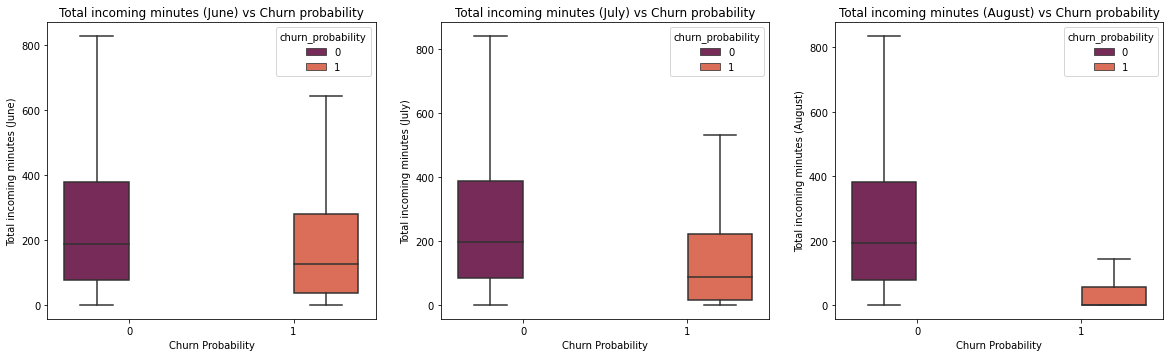

In [62]:
# Let's have a look at the spread of data using boxplot for month of June(6), July(7) and August(8)
# Total incoming minute for June, July, August vs Churn Probability
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(data=tc_hvl_rng, y="total_ic_mou_6",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total incoming minutes (June) vs Churn probability')
plt.ylabel('Total incoming minutes (June)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,2)
sns.boxplot(data=tc_hvl_rng, y="total_ic_mou_7",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total incoming minutes (July) vs Churn probability')
plt.ylabel('Total incoming minutes (July)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,3)
sns.boxplot(data=tc_hvl_rng, y="total_ic_mou_8",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total incoming minutes (August) vs Churn probability')
plt.ylabel('Total incoming minutes (August)')
plt.xlabel('Churn Probability')
plt.show()

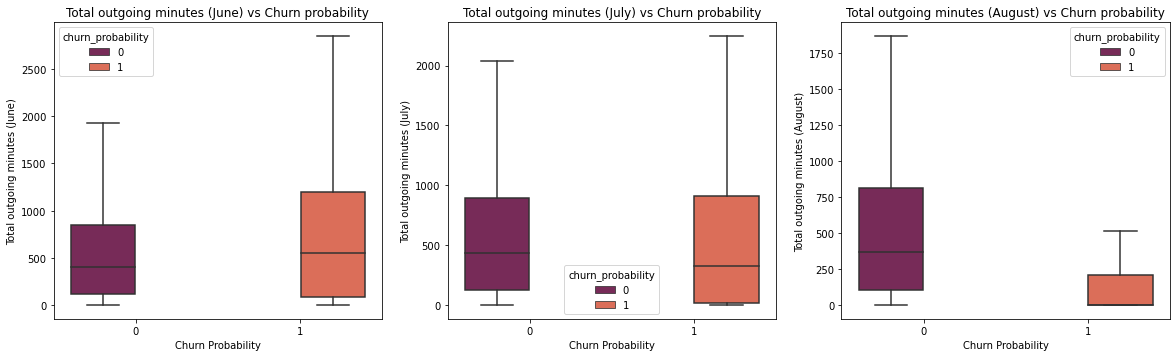

In [63]:
# Let's have a look at the spread of data using boxplot for month of June(6), July(7) and August(8)
# Total outgoing minute for June, July, August vs Churn Probability
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(data=tc_hvl_rng, y="total_og_mou_6",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total outgoing minutes (June) vs Churn probability')
plt.ylabel('Total outgoing minutes (June)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,2)
sns.boxplot(data=tc_hvl_rng, y="total_og_mou_7",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total outgoing minutes (July) vs Churn probability')
plt.ylabel('Total outgoing minutes (July)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,3)
sns.boxplot(data=tc_hvl_rng, y="total_og_mou_8",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total outgoing minutes (August) vs Churn probability')
plt.ylabel('Total outgoing minutes (August)')
plt.xlabel('Churn Probability')
plt.show()

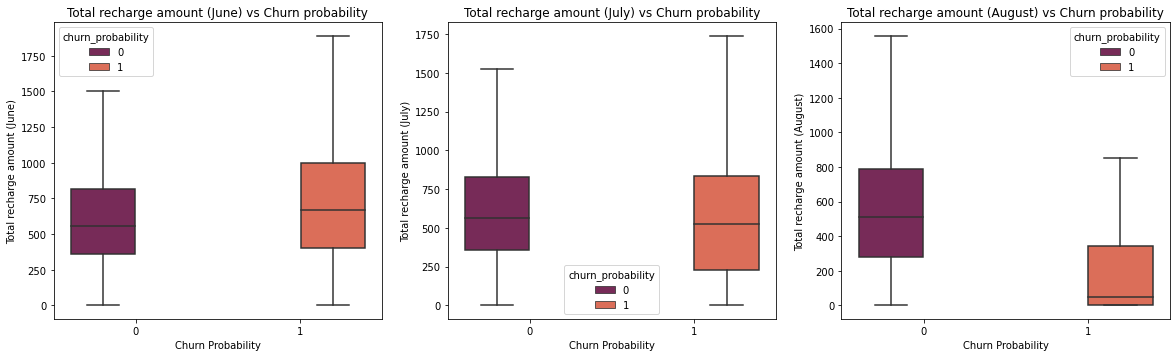

In [64]:
# Let's have a look at the spread of data using boxplot for month of June(6), July(7) and August(8)
# Total recharge amount for June, July, August vs Churn Probability
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(data=tc_hvl_rng, y="total_rech_amt_6",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total recharge amount (June) vs Churn probability')
plt.ylabel('Total recharge amount (June)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,2)
sns.boxplot(data=tc_hvl_rng, y="total_rech_amt_7",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total recharge amount (July) vs Churn probability')
plt.ylabel('Total recharge amount (July)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,3)
sns.boxplot(data=tc_hvl_rng, y="total_rech_amt_8",x="churn_probability",hue="churn_probability",showfliers=False,palette=('rocket'))
plt.title('Total recharge amount (August) vs Churn probability')
plt.ylabel('Total recharge amount (August)')
plt.xlabel('Churn Probability')
plt.show()

In [65]:
# Let's have a look at the correlation between Outgoing and incoming columns:
cols_corr = tc_hvl_rng.columns
cols_og_corr_b = cols_corr.str.contains('og')
cols_og_corr = list(cols_corr[cols_og_corr_b])
cols_ic_corr_b = cols_corr.str.contains('ic')
cols_ic_corr = list(cols_corr[cols_ic_corr_b])

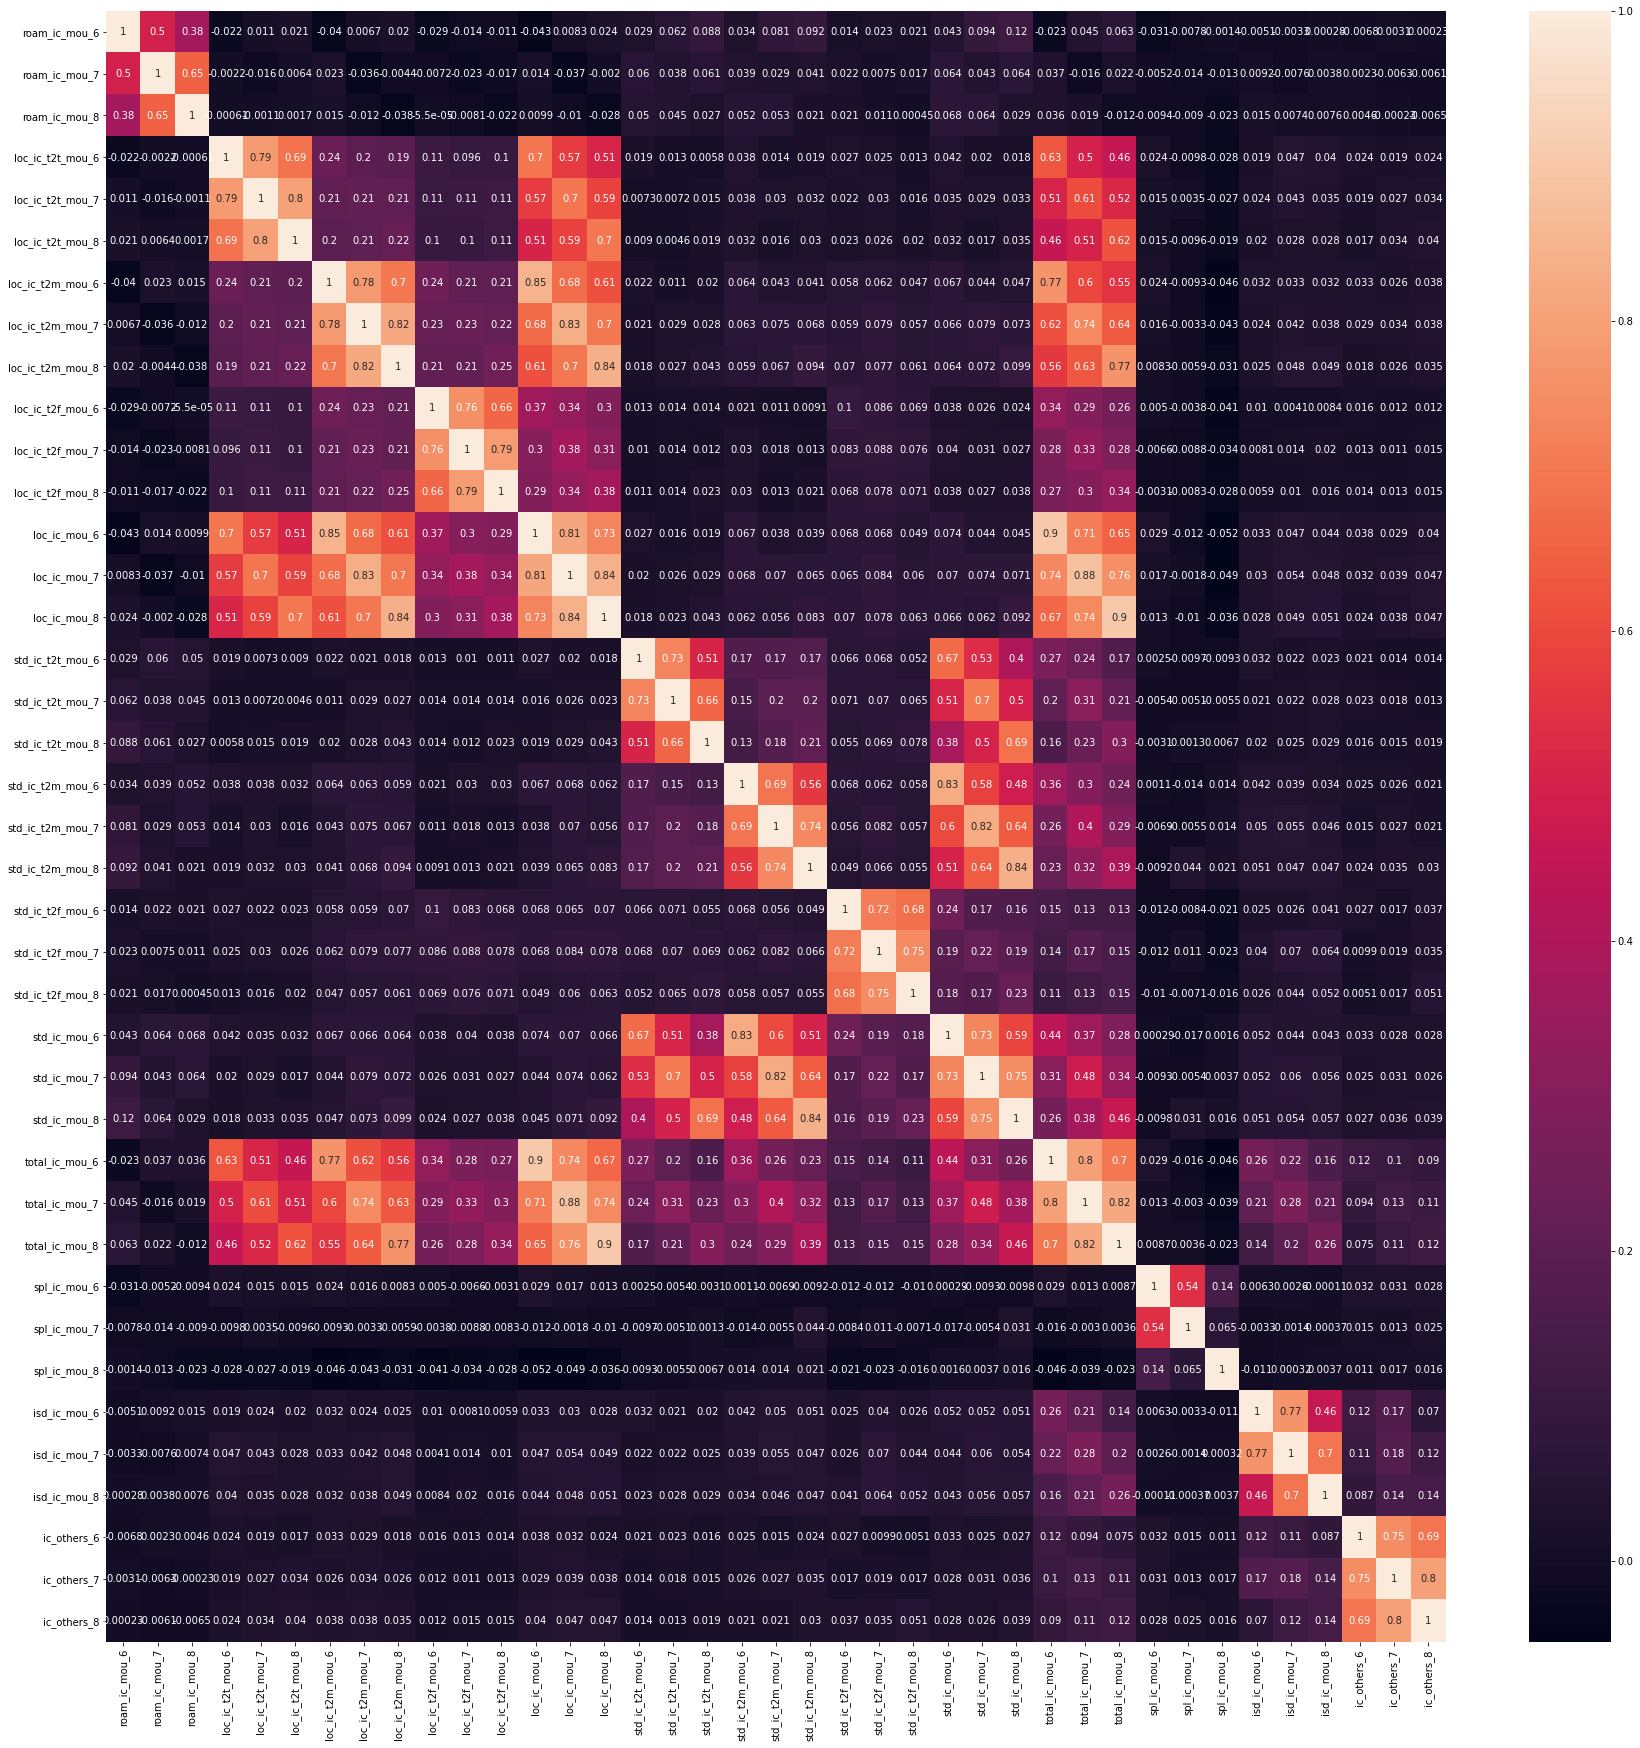

In [66]:
# Plotting heatmap to understand correlation - incoming data columns
plt.figure(figsize=(30,30))
sns.heatmap(tc_hvl_rng[cols_ic_corr].corr(),annot = True)
plt.show()

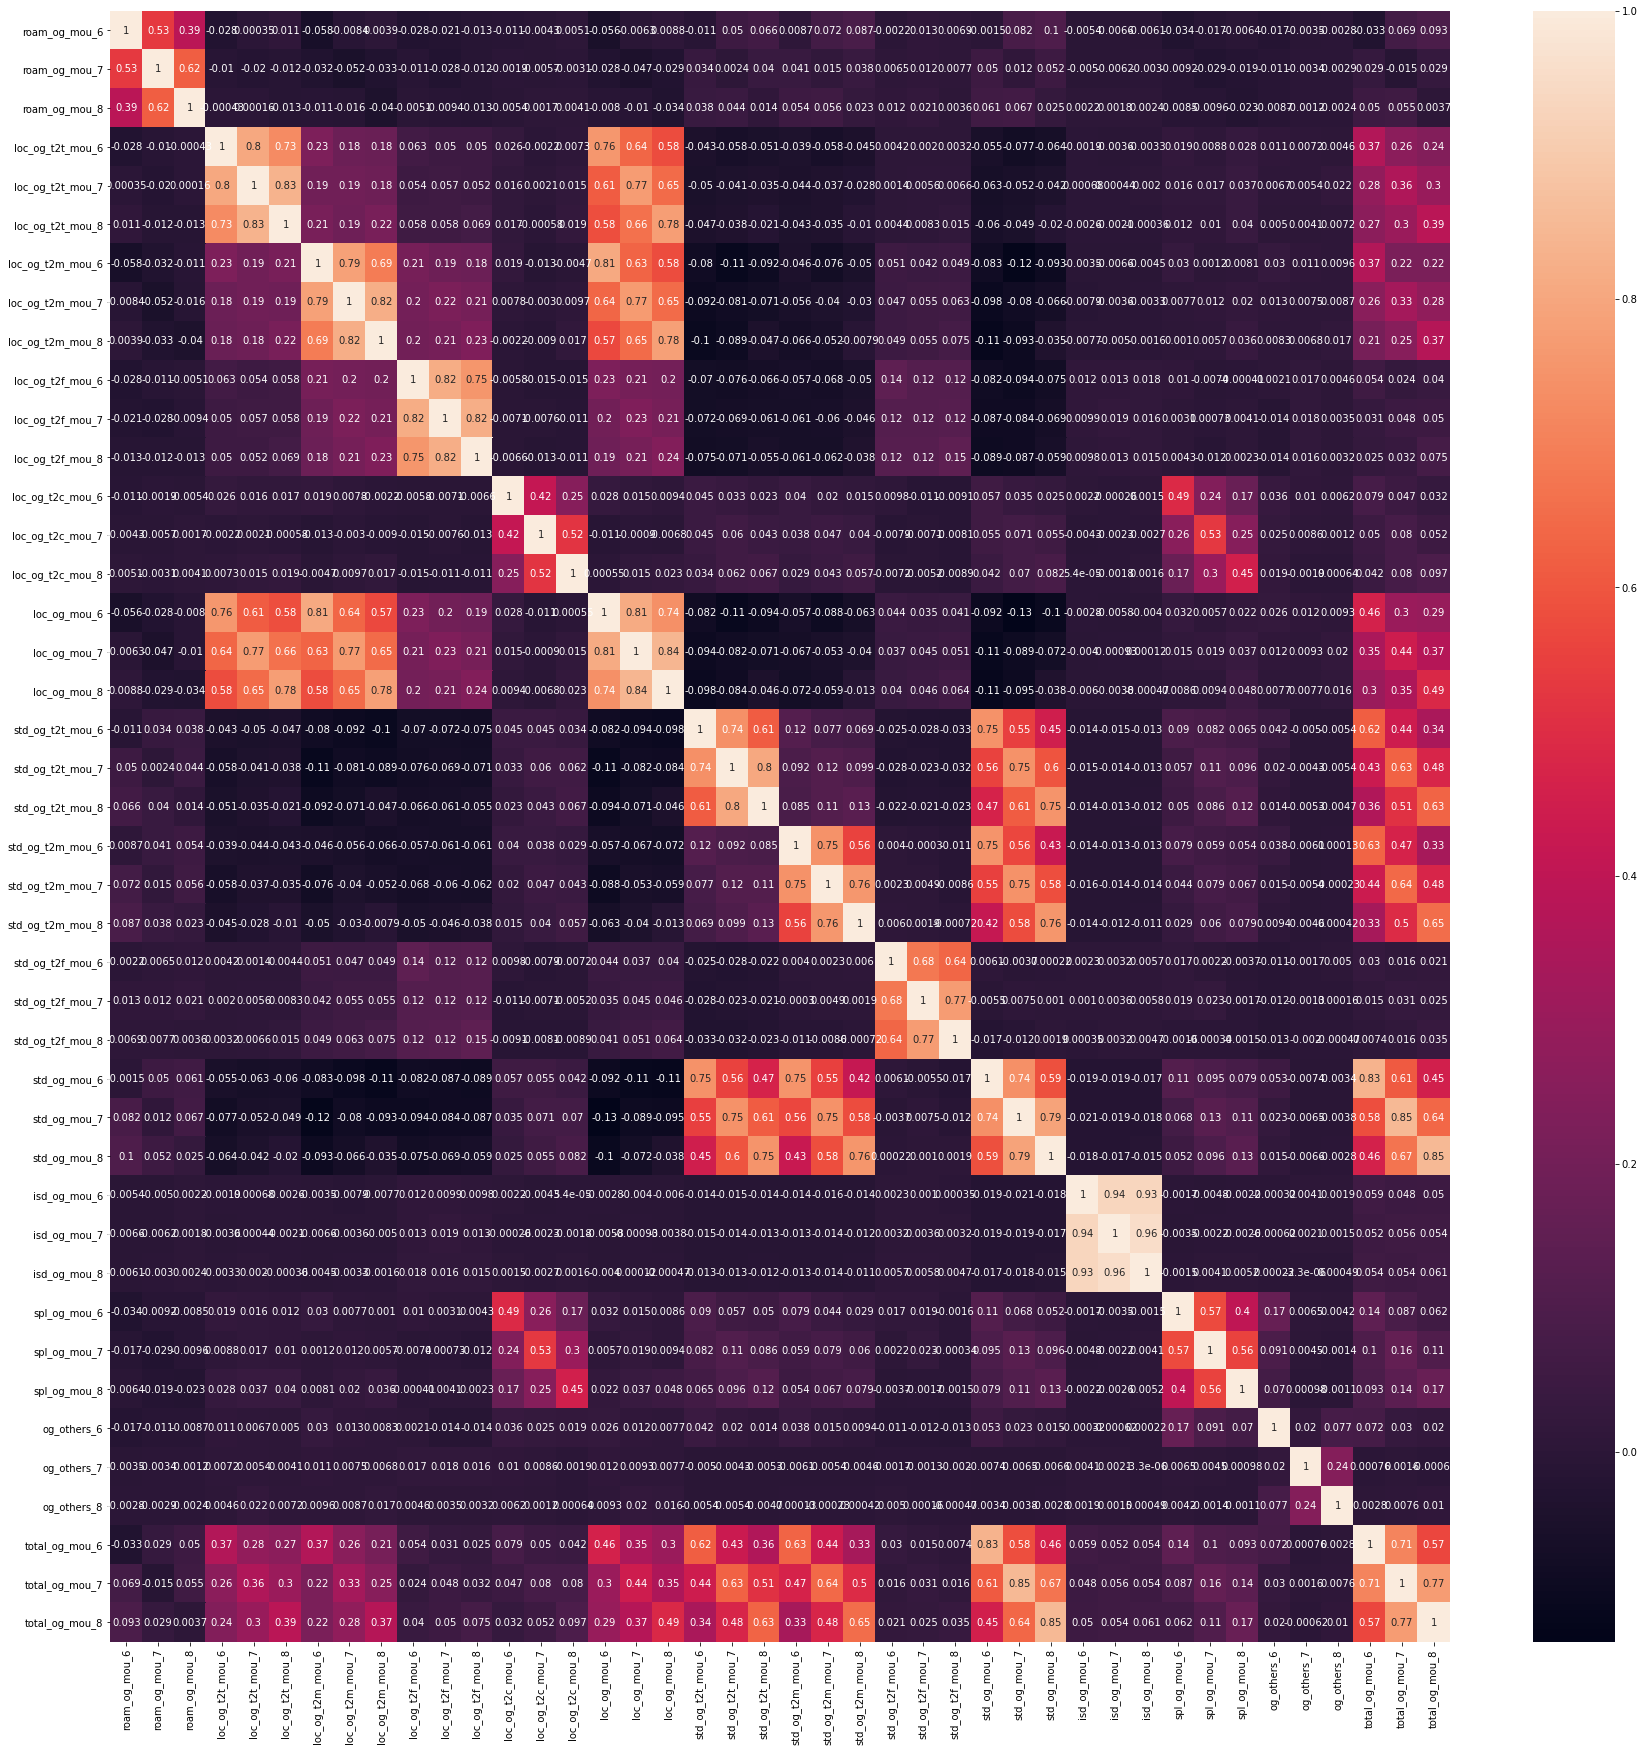

In [67]:
# Plotting heatmap to understand correlation - outgoing data columns
plt.figure(figsize=(30,30))
sns.heatmap(tc_hvl_rng[cols_og_corr].corr(),annot = True)
plt.show()

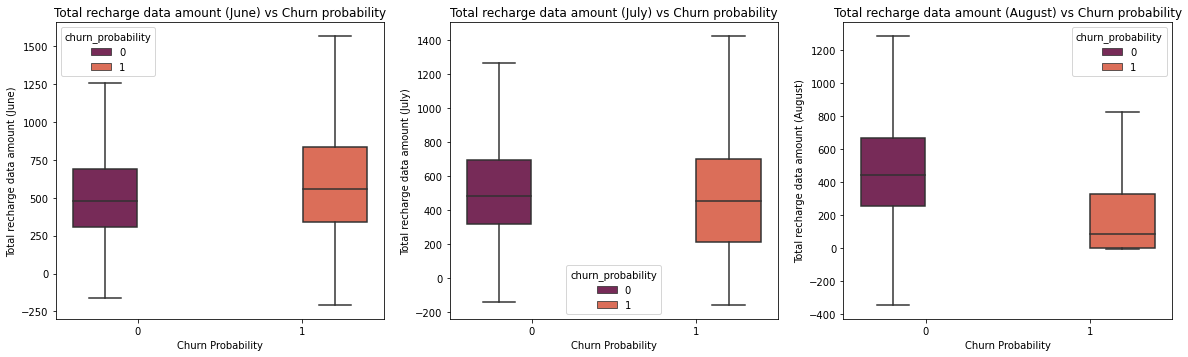

In [68]:
# Let's have a look at the spread of data using boxplot for month of June(6), July(7) and August(8)
# Total recharge amount for June, July, August vs Churn Probability
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(data=tc_hvl_rng, y="arpu_6", x="churn_probability", hue="churn_probability", showfliers=False, palette=('rocket'))
plt.title('Total recharge data amount (June) vs Churn probability')
plt.ylabel('Total recharge data amount (June)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,2)
sns.boxplot(data=tc_hvl_rng, y="arpu_7", x="churn_probability", hue="churn_probability", showfliers=False, palette=('rocket'))
plt.title('Total recharge data amount (July) vs Churn probability')
plt.ylabel('Total recharge data amount (July)')
plt.xlabel('Churn Probability')
plt.subplot(2,3,3)
sns.boxplot(data=tc_hvl_rng, y="arpu_8", x="churn_probability", hue="churn_probability", showfliers=False, palette=('rocket'))
plt.title('Total recharge data amount (August) vs Churn probability')
plt.ylabel('Total recharge data amount (August)')
plt.xlabel('Churn Probability')
plt.show()

In [69]:
# Checking for features having high correlation - above 0.80
tc_corr = tc_hvl_rng.corr().abs()
cor1 = tc_corr.where(np.triu(np.ones(tc_corr.shape), k=1).astype(np.bool))
hcorr = [col for col in cor1.columns if any(cor1[col] >= 0.8)]
print('Features with high correlation: ', hcorr)
print('Features with high correlation: ', len(hcorr))

Features with high correlation:  ['onnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
Features with high correlation:  46


- We can see that there are high correlation between features with 46 features having correrlation more than 0.80. This will be taken care of by PCA for the predictor models
- The data is class imbalanced since there is very few churns relative to the Non churns. The dataset is highly skewed. This will be treated using feature engineering

### Feature Engineering and Variable Transformation

#### Splitting data into Train Test sets:

In [70]:
# Train-Test Split
y= tc_hvl_rng['churn_probability']
X= tc_hvl_rng.drop('churn_probability', axis= 1)
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7, stratify= y, random_state= 60)
print('Number of rows and columns in Train Data: ', X_train.shape)
print('Number of rows and columns in Test Data: ', X_test.shape)

Number of rows and columns in Train Data:  (14545, 149)
Number of rows and columns in Test Data:  (6235, 149)


In [71]:
# Let's have a look at the train set
X_train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
60244,60244,549.462,821.423,658.984,599.13,280.39,673.84,327.29,465.53,416.81,0.0,0.0,0.00,0.0,0.0,0.00,599.13,280.39,672.86,226.01,373.14,336.61,2.06,11.46,4.23,3.73,0.0,0.00,827.21,665.01,1013.71,0.00,0.00,0.98,82.01,78.56,75.96,0.00,0.0,0.00,82.01,78.56,76.94,0.0,51.44,0.71,20.21,5.28,2.18,2.29,0.0,0.0,931.74,800.31,1093.56,45.94,270.83,27.83,193.93,147.06,210.11,6.24,2.51,2.56,246.13,420.41,240.51,0.35,2.54,2.59,35.61,15.66,26.83,0.46,0.00,0.00,36.43,18.21,29.43,328.16,490.69,311.08,0.15,0.0,0.0,42.89,51.69,40.66,2.54,0.36,0.46,20,20,16,628,1012,719,90,128,200,25,0,61,25.0,25.0,25.0,7.0,4.0,6.0,0.0,0.0,0.0,519.28,266.01,572.65,0.00,0.00,0.00,0.00,0.00,0.00,56.42,13.30,97.24,0,0,0,7,4,6,0,0,0,0,0,0,743,0.00,0.00,0.00,30.0,30.0,30.0,30.0,30.0,30.0,1225.0,400.0,900.0
32085,32085,561.279,686.848,733.169,17.49,46.39,128.58,789.16,958.36,878.84,0.0,0.0,0.00,0.0,0.0,0.00,12.48,22.69,31.63,133.34,125.54,116.44,31.68,6.99,16.03,7.53,0.0,3.75,177.51,155.24,164.11,5.01,23.69,96.94,615.06,821.43,742.61,0.00,0.0,0.00,620.08,845.13,839.56,0.0,0.00,0.00,9.06,5.33,22.13,0.00,0.0,0.0,806.66,1005.71,1025.81,22.43,18.33,49.11,80.29,216.36,178.59,14.49,6.24,15.69,117.23,240.94,243.41,2.03,17.51,26.33,76.29,52.08,57.86,0.70,2.04,0.73,79.03,71.64,84.93,196.26,312.59,328.34,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,30,33,586,877,750,90,130,50,46,130,30,46.0,17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,60.50,6.81,0.00,184.71,23.60,0.00,33.31,56.23,0.00,12.77,14.40,0.00,0,0,0,1,1,0,0,0,0,0,0,0,1223,5.61,19.71,221.74,28.0,31.0,31.0,28.0,20.0,0.0,46.0,17.0,0.0
58517,58517,286.130,324.799,420.250,29.56,7.61,35.71,205.83,193.51,205.16,0.0,0.0,0.00,0.0,0.0,0.00,29.13,6.64,24.71,120.26,139.53,131.74,5.01,1.46,0.65,0.00,0.0,0.00,154.41,147.64,157.11,0.43,0.96,11.00,78.63,29.79,72.34,1.91,0.0,0.41,80.98,30.7

In [72]:
# Dropping the id column from the X_*
X_train = X_train.drop('id',axis=1)
X_test = X_test.drop('id',axis=1)

#### Scaling features using Standard scalar:

In [73]:
# Instantiating the function
scaler = StandardScaler()
# fit transform on train data
X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(data=X_train_sc, columns=[i for i in X_train.columns])
# fit transform on test data
X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(data=X_test_sc, columns=[i for i in X_test.columns])

#### Treating dataset with SMOTE to reduce class imbalance:

In [74]:
# Instantiating the function
sm = SMOTE(random_state= 60)
X_train_sm, y_train_sm= sm.fit_resample(X_train_sc, y_train)
X_train_sm= pd.DataFrame(X_train_sm, columns= X_train_sc.columns)

#### Treating dataset with Power Transformer to reduce skewness in data:

In [75]:
# Instantiating the function
pt = PowerTransformer(method='yeo-johnson', standardize=True) 
#Fit & Transform the train data to the powertransformer
skl_yeojohnson = pt.fit_transform(X_train_sm)
#Pass the transformed data into a new dataframe 
X_train_pt = pd.DataFrame(data=skl_yeojohnson, columns=[i for i in X_train_sm.columns])
#Transform the test data to the powertransformer
skl_yeojohnson_test = pt.transform(X_test_sc)
X_test_pt = pd.DataFrame(data=skl_yeojohnson_test, columns=[i for i in X_test_sc.columns])
# Let's have a look at the dataset
X_train_pt.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
0,0.154541,0.979841,1.068550,1.306168,0.768789,1.865609,0.316458,0.832885,1.206878,-0.504301,-0.516052,-0.563331,-0.515588,-0.558667,-0.595964,2.121493,2.028391,2.158210,1.197773,1.657237,1.765504,0.342242,1.986259,1.506493,2.079580,-0.571302,-0.476355,1.802215,1.738744,1.961479,-0.814360,-0.778452,-0.599838,0.001055,0.052014,0.680645,-0.390971,-0.370609,-0.311071,-0.551109,-0.501117,-0.016922,-0.293462,4.354292,2.81399,1.833122,0.632496,0.310272,1.914925,-0.106852,-0.057215,0.758635,0.719479,1.514656,0.574702,2.026272,0.500522,1.085388,0.893793,1.497118,0.457088,-0.176760,0.050858,0.876533,1.490485,1.231289,-0.745158,-0.264600,0.141999,1.163066,0.390157,1.552996,0.310439,-0.464904,-0.417302,0.621999,0.024639,1.051235,0.872824,1.379458,1.213280,1.874405,-0.284289,-0.239092,2.593402,2.560747,2.941137,2.661242,0.687736,1.642973,1.090395,1.219747,1.384882,0.130112,1.046402,1.025549,-0.502423,0.122441,0.999953,-0.876940,-1.292725,0.570955,-0.155099,-0.103549,0.317663,1.880229,1.723889,2.046745,-0.568004,-0.539036,-0.434840,1.960205,1.855446,2.431809,-0.629332,-0.612273,-0.522222,-0.588258,-0.566501,-0.465736,1.104394,0.046643,2.197292,-0.375945,-0.375678,-0.302883,1.958631,1.879532,2.191899,-0.426142,-0.404157,-0.34358,-0.360328,-0.352137,-0.25914,-0.110241,-0.528166,-0.595010,-0.600286,1.251113,0.810670,1.140166,1.495702,1.497377,1.678898,1.766182,0.949655,2.050484
1,0.189050,0.690265,1.196572,-0.958926,-0.632965,0.563774,1.226549,1.493837,1.731444,-0.504301,-0.516052,-0.563331,-0.515588,-0.558667,-0.595964,-0.560790,-0.128026,0.536618,0.638995,0.670821,0.948048,2.141078,1.660008,2.272108,2.209088,-0.571302,2.386780,0.454960,0.402217,0.829903,-0.744991,-0.445409,1.103656,1.600434,1.796388,2.089939,-0.390971,-0.370609,-0.311071,0.900832,1.251827,1.805110,-0.293462,-0.273731,-0.2

In [76]:
# Let's have a look at the dataset shape
print('Power transformed train dataset: ', X_train_pt.shape)
print('Power transformed test dataset: ', X_test_pt.shape)

Power transformed train dataset:  (26660, 148)
Power transformed test dataset:  (6235, 148)


### Principal component analysis (PCA)

Now we are going to use Principal Component analysis(PCA) for getting the maximum information from the data and feature reduction for optimal performance

In [77]:
# Instantiating the function
pca = PCA(random_state= 60)

#Doing the PCA on the train data
pca.fit(X_train_pt)

PCA(random_state=60)

In [78]:
#Lets have a look at the variance explained by each of the features in the dataset
pca.explained_variance_ratio_

array([1.69535916e-01, 1.38591594e-01, 6.14753040e-02, 5.57269608e-02,
       3.81758518e-02, 3.07632731e-02, 2.49506078e-02, 2.33759609e-02,
       2.12418429e-02, 1.99891444e-02, 1.90130923e-02, 1.86517681e-02,
       1.54321038e-02, 1.41743444e-02, 1.22930905e-02, 1.17521478e-02,
       1.15359393e-02, 1.05575976e-02, 9.99191515e-03, 9.39497093e-03,
       9.11817053e-03, 8.82043519e-03, 8.55131442e-03, 7.65811796e-03,
       7.54240229e-03, 7.44577500e-03, 6.99583399e-03, 6.64715686e-03,
       6.48463349e-03, 6.26963044e-03, 6.08601355e-03, 6.05889235e-03,
       5.94455734e-03, 5.78267193e-03, 5.75077880e-03, 5.56438822e-03,
       5.51465350e-03, 5.30809502e-03, 5.19627080e-03, 4.89834377e-03,
       4.80136456e-03, 4.71963889e-03, 4.52299685e-03, 4.42070674e-03,
       4.23725237e-03, 4.14397402e-03, 4.11323967e-03, 3.95510985e-03,
       3.91510172e-03, 3.80838098e-03, 3.73297857e-03, 3.64251409e-03,
       3.59891762e-03, 3.53777233e-03, 3.39176687e-03, 3.32286021e-03,
      

In [79]:
colnames = list(X_train_pt.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.sort_values(by = 'PC1', ascending = False).head(10)

,PC1,PC2,PC3,Feature
53,0.157429,0.026466,0.121125,total_og_mou_8
52,0.152600,-0.065035,0.082956,total_og_mou_7
8,0.149948,0.042540,0.089562,offnet_mou_8
28,0.148058,0.077028,-0.092129,loc_og_mou_7
7,0.143716,-0.033157,0.035302,offnet_mou_7
79,0.143541,0.085645,-0.068681,total_ic_mou_7
19,0.140897,0.073832,-0.091831,loc_og_t2m_mou_7
29,0.140699,0.112013,-0.020702,loc_og_mou_8
16,0.136907,0.057986,-0.068118,loc_og_t2t_mou_7
20,0.136074,0.110553,-0.019074,loc_og_t2m_mou_8


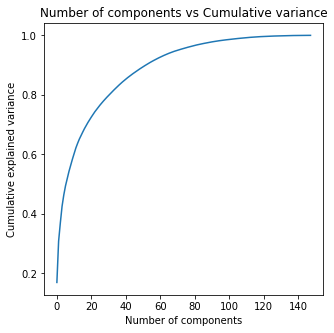

In [80]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Number of components vs Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [81]:
# Let's check for the cumulative variance explained by the features after PCA 
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 16.95,  30.81,  36.96,  42.53,  46.35,  49.43,  51.93,  54.27,
        56.39,  58.39,  60.29,  62.16,  63.7 ,  65.12,  66.35,  67.53,
        68.68,  69.74,  70.74,  71.68,  72.59,  73.47,  74.33,  75.1 ,
        75.85,  76.59,  77.29,  77.95,  78.6 ,  79.23,  79.84,  80.45,
        81.04,  81.62,  82.2 ,  82.76,  83.31,  83.84,  84.36,  84.85,
        85.33,  85.8 ,  86.25,  86.69,  87.11,  87.52,  87.93,  88.33,
        88.72,  89.1 ,  89.47,  89.83,  90.19,  90.54,  90.88,  91.21,
        91.52,  91.83,  92.13,  92.42,  92.7 ,  92.98,  93.24,  93.49,
        93.74,  93.98,  94.21,  94.43,  94.63,  94.82,  95.  ,  95.18,
        95.36,  95.54,  95.71,  95.87,  96.03,  96.19,  96.34,  96.49,
        96.64,  96.78,  96.91,  97.03,  97.15,  97.27,  97.39,  97.5 ,
        97.61,  97.72,  97.82,  97.92,  98.01,  98.1 ,  98.18,  98.26,
        98.34,  98.41,  98.48,  98.55,  98.62,  98.69,  98.76,  98.82,
        98.88,  98.94,  99.  ,  99.06,  99.12,  99.18,  99.23,  99.28,
      

We are going to use 95% of the variance explanation. Let's have a look at the number of features needed for this variance explanation

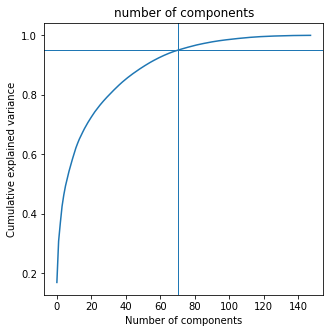

In [82]:
#Let's have a look at the Variance explanation at 95%
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.95, linewidth=1)
plt.axvline(x=70, linewidth=1)
plt.show()

We can see the optimal number of features that explains this variance is 70. So we are going to build a PCA model using number of features as 70

In [83]:
# Creating optimal pca model with 70 features explaining 95% of variance
pca_opt = PCA(n_components = 70, random_state = 60)

In [84]:
X_train_pca_opt = pca_opt.fit_transform(X_train_pt)
X_test_pca_opt = pca_opt.transform(X_test_pt)
print('The rows and column for the PCA model is: ', X_train_pca_opt.shape)
print('The rows and column for the PCA model is: ', X_test_pca_opt.shape)

The rows and column for the PCA model is:  (26660, 70)
The rows and column for the PCA model is:  (6235, 70)


## Learning Models:

We will train and test the models with the following models and evaluate the one with the best results:
- Logistic regression with PCA
- Support Vector Machine with PCA
- Random forest with PCA
- XgBoost with PCA

We will also check for the important predictors using Logistic regression model using  

### Logistic regression model with PCA

We are going to create a Logistic Regression model with PCA and check for the model accuracy

In [85]:
# Creating a function to plot ROC curve
def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False)
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [86]:
# Creating KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 60)

# Specify params
params = {"C": [ 0.01, 0.1, 1, 10]}


model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca_opt, y_train_sm)
print('Best Parameter :', model_cv.best_params_)
print('Accuracy :', round(model_cv.best_score_, 3))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameter : {'C': 1}
Accuracy : 0.886


In [87]:
# Creating optimal Logistic regression model with optimal value from GridSearchCV parameters
logsk_opt = LogisticRegression(C = 1)
logsk_opt.fit(X_train_pca_opt, y_train_sm)
# Predicted probabilities
y_train_pred_opt = logsk_opt.predict(X_train_pca_opt)

In [88]:
# Confusion matrix
confusion = confusion_matrix(y_train_sm, y_train_pred_opt)
print(confusion)

[[11657  1673]
 [ 1504 11826]]


In [89]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('Logistic Regression model with PCA - Train Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Logistic Regression model with PCA - Train Sensitivity: ', round(TP / float(TP+FN),2))
print('Logistic Regression model with PCA - Train Specificity: ', round(TN / float(TN+FP),2))

Logistic Regression model with PCA - Train Accuracy:  0.88
Logistic Regression model with PCA - Train Sensitivity:  0.89
Logistic Regression model with PCA - Train Specificity:  0.87


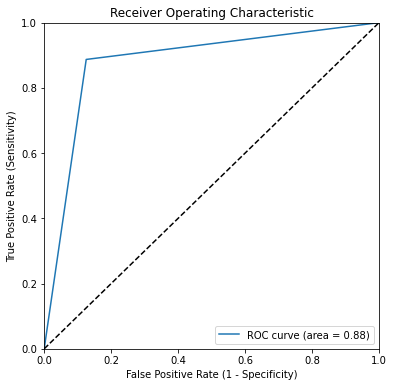

In [91]:
# Ploting ROC curve
fpr, tpr, thresholds= roc_curve(y_train_sm, y_train_pred_opt, drop_intermediate = False)
roc_plot(y_train_sm, y_train_pred_opt)

In [92]:
# Making predictions
y_test_pred_opt = logsk_opt.predict(X_test_pca_opt)

In [93]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_opt)
print(confusion)

[[4961  753]
 [  98  423]]


In [94]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('Logistic Regression model with PCA - Test Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Logistic Regression model with PCA - Test Sensitivity: ', round(TP / float(TP+FN),2))
print('Logistic Regression model with PCA - Test Specificity: ', round(TN / float(TN+FP),2))

Logistic Regression model with PCA - Test Accuracy:  0.88
Logistic Regression model with PCA - Test Sensitivity:  0.81
Logistic Regression model with PCA - Test Specificity:  0.87


### Support Vector Machine with PCA

Making predictions using Support Vector Machine with PCA

In [96]:
# specify range of hyperparameters
hyper_params = [ {'gamma': [0.001, 0.002, 0.0001],
                     'C': [1, 10, 100]}]

# specify model with RBF kernel
model = SVC(kernel = "rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca_opt, y_train_sm)
print('Best Parameter :', model_cv.best_params_)
print('Accuracy :', round(model_cv.best_score_), 3)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameter : {'C': 100, 'gamma': 0.002}
Accuracy : 1 3


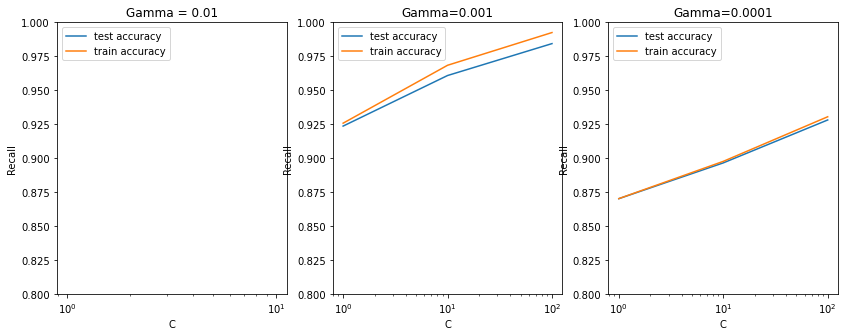

In [97]:
# Visualising the Train test accuracy for different hyperparameter values
cv_results = pd.DataFrame(model_cv.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma = 0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(1,3,2)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(1,3,3)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [98]:
# Building the model with optimal hyperparameters from GridSearchCV parameters
svm_opt = SVC(C=10, gamma=0.002, kernel="rbf",random_state = 60)
svm_opt.fit(X_train_pca_opt, y_train_sm)

SVC(C=10, gamma=0.002, random_state=60)

In [99]:
#Making predictions
y_train_pred_opt = svm_opt.predict(X_train_pca_opt)

In [100]:
# Confusion matrix
confusion = confusion_matrix(y_train_sm, y_train_pred_opt)
print(confusion)

[[12568   762]
 [  130 13200]]


In [101]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('Support Vector Machine with PCA - Train Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Support Vector Machine with PCA - Train Sensitivity: ', round(TP / float(TP+FN),2))
print('Support Vector Machine with PCA - Train Specificity: ', round(TN / float(TN+FP),2))

Support Vector Machine with PCA - Train Accuracy:  0.97
Support Vector Machine with PCA - Train Sensitivity:  0.99
Support Vector Machine with PCA - Train Specificity:  0.94


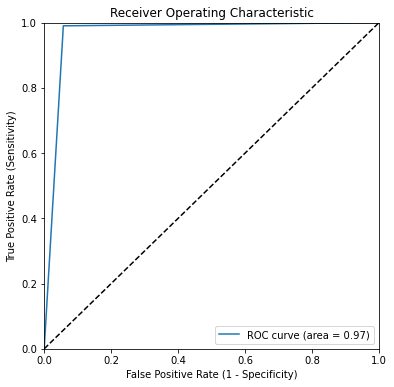

In [103]:
# Ploting ROC curve
fpr, tpr, thresholds= roc_curve(y_train_sm, y_train_pred_opt, drop_intermediate = False )
roc_plot(y_train_sm, y_train_pred_opt)

In [104]:
# Making predictions
y_test_pred_opt = svm_opt.predict(X_test_pca_opt)

In [105]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_opt)
print(confusion)

[[5256  458]
 [ 148  373]]


In [106]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('Support Vector Machine with PCA - Test Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Support Vector Machine with PCA - Test Sensitivity: ', round(TP / float(TP+FN),2))
print('Support Vector Machine with PCA - Test Specificity: ', round(TN / float(TN+FP),2))

Support Vector Machine with PCA - Test Accuracy:  0.97
Support Vector Machine with PCA - Test Sensitivity:  0.72
Support Vector Machine with PCA - Test Specificity:  0.92


### Random forest with PCA

Making predictions using Random forest with PCA

In [108]:
# Creating Random Forest classification model without tuning
rf_pca = RandomForestClassifier(random_state = 60)
rf_pca.fit(X_train_pca_opt, y_train_sm)
# Predicted probabilities
y_train_pred_opt = rf_pca.predict(X_train_pca_opt)
y_test_pred_opt = rf_pca.predict(X_test_pca_opt)
# Accuracy
print('Train Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Test Accuracy: ', round(accuracy_score(y_test, y_test_pred_opt),2))
# Sensitivity
print('Train Sensitivity: ', round(recall_score(y_train_sm, y_train_pred_opt),2))
print('Test Sensitivity: ', round(recall_score(y_test, y_test_pred_opt),2))

Train Accuracy:  1.0
Test Accuracy:  0.92
Train Sensitivity:  1.0
Test Sensitivity:  0.61


In [109]:
# Using GridSearchCV for hyperparameter tuning
param_grid = {
    'max_depth': [6,7,8],
    'min_samples_leaf': [100,150],
    'n_estimators': [150,200,250], 
    'max_features': [10,20,30,40]
}

model= RandomForestClassifier(random_state=100)
# Instantiate the grid search model
model_cv = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           cv = 3,
                           scoring= 'recall',
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca_opt, y_train_sm)
print('Best Parameter :', model_cv.best_params_)
print('Accuracy :', model_cv.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameter : {'max_depth': 8, 'max_features': 30, 'min_samples_leaf': 100, 'n_estimators': 150}
Accuracy : 0.847710952729304


In [185]:
# Building the model with optimal hyperparameters
rf_opt = RandomForestClassifier(max_depth= 8, max_features= 30, min_samples_leaf= 100, n_estimators= 150, random_state= 60)
rf_opt.fit(X_train_pca_opt, y_train_sm)

RandomForestClassifier(max_depth=8, max_features=30, min_samples_leaf=100,
                       n_estimators=150, random_state=60)

In [186]:
# Making predictions
y_train_pred_opt = rf_opt.predict(X_train_pca_opt)

In [187]:
# Confusion matrix
confusion = confusion_matrix(y_train_sm, y_train_pred_opt)
print(confusion)

[[11937  1393]
 [ 1755 11575]]


In [113]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('Random forest with PCA - Train Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Random forest with PCA - Train Sensitivity: ', round(TP / float(TP+FN),2))
print('Random forest with PCA - Train Specificity: ', round(TN / float(TN+FP),2))

Random forest with PCA - Train Accuracy:  0.88
Random forest with PCA - Train Sensitivity:  0.87
Random forest with PCA - Train Specificity:  0.89


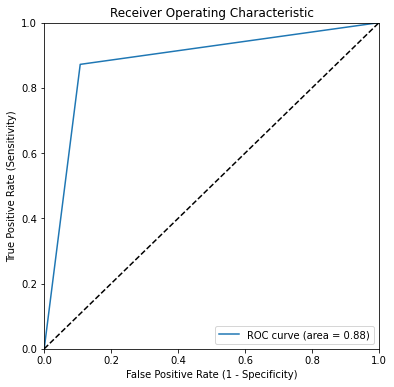

In [115]:
# Ploting ROC curve
fpr, tpr, thresholds= roc_curve(y_train_sm, y_train_pred_opt, drop_intermediate = False )
roc_plot(y_train_sm, y_train_pred_opt)

In [116]:
# Making predictions
y_test_pred_opt = rf_opt.predict(X_test_pca_opt)

In [118]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_opt)
print(confusion)

[[5044  670]
 [ 129  392]]


In [119]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('Random forest with PCA - Test Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('Random forest with PCA - Test Sensitivity: ', round(TP / float(TP+FN),2))
print('Random forest with PCA - Test Specificity: ', round(TN / float(TN+FP),2))

Random forest with PCA - Test Accuracy:  0.88
Random forest with PCA - Test Sensitivity:  0.75
Random forest with PCA - Test Specificity:  0.88


### XgBoost with PCA

Making predictions using XgBoost with PCA

In [121]:
# Initializing function
xgb_pca = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 60)
xgb_pca.fit(X_train_pca_opt, y_train_sm)

[08:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='gpu_predictor', random_state=60,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [122]:
# Predicted probabilities
y_train_pred_opt = xgb_pca.predict(X_train_pca_opt)
y_test_pred_opt = xgb_pca.predict(X_test_pca_opt)
# Accuracy
print('Train Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt), 2))
print('Test Accuracy: ', round(accuracy_score(y_test, y_test_pred_opt),2))
# Sensitivity
print('Train Sensitivity: ', round(recall_score(y_train_sm, y_train_pred_opt), 2))
print('Test Sensitivity: ', round(recall_score(y_test, y_test_pred_opt),2))

Train Accuracy:  1.0
Test Accuracy:  0.91
Train Sensitivity:  1.0
Test Sensitivity:  0.65


In [123]:
# Param grid
param_grid= {'n_estimators': [200, 300, 400],
        'gamma': [1,10,100],
        'max_depth': [6,7,8],
        'learning_rate': [0.1]
        }

model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state= 60)

# Instantiate the grid search model
model_cv = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           cv = 3,
                           scoring= 'recall',
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca_opt, y_train_sm)
print('Best Parameter :',model_cv.best_params_)
print('Accuracy :', round(model_cv.best_score_,3))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[08:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameter : {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Best Score : 1 3


We can see that using gamma as 1 is going to overfit the data and the sensitivity is going to fall as well. So we are using all optimum parameters but gamma as 10 to build our model so as to avoid model overfit

In [174]:
# Building the model with optimal hyperparameters
xgb_opt = XGBClassifier(gamma = 10, learning_rate= 0.1, max_depth= 6, n_estimators= 300
                       ,tree_method='gpu_hist', predictor='gpu_predictor')

xgb_opt.fit(X_train_pca_opt, y_train_sm)

[08:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=10, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=12,
              num_parallel_tree=1, predictor='gpu_predictor', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [175]:
#Making prediction
y_train_pred_opt = xgb_opt.predict(X_train_pca_opt)

In [176]:
# Confusion matrix
confusion = confusion_matrix(y_train_sm, y_train_pred_opt)
print(confusion)

[[12589   741]
 [  318 13012]]


In [177]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [178]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('XgBoost with PCA - Train Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('XgBoost with PCA - Train Sensitivity: ', round(TP / float(TP+FN),2))
print('XgBoost with PCA - Train Specificity: ', round(TN / float(TN+FP),2))

XgBoost with PCA - Train Accuracy:  0.96
XgBoost with PCA - Train Sensitivity:  0.98
XgBoost with PCA - Train Specificity:  0.94


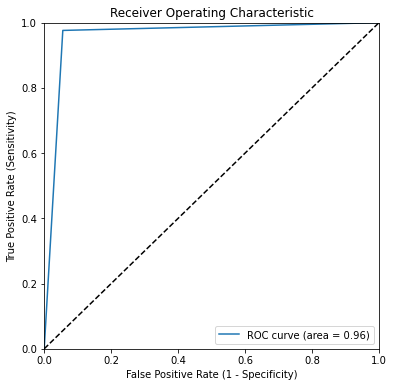

In [179]:
# Ploting ROC curve
fpr, tpr, thresholds= roc_curve(y_train_sm, y_train_pred_opt, drop_intermediate = False)
roc_plot(y_train_sm, y_train_pred_opt)

In [180]:
# Making Prediction
y_test_pred_opt = xgb_opt.predict(X_test_pca_opt)

In [181]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_opt)
print(confusion)

[[5220  494]
 [ 142  379]]


In [182]:
# Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [183]:
# Accuracy, Sensitivity and Specificity of the model evaluation
print('XgBoost with PCA - Test Accuracy: ', round(accuracy_score(y_train_sm, y_train_pred_opt),2))
print('XgBoost with PCA - Test Sensitivity: ', round(TP / float(TP+FN),2))
print('XgBoost with PCA - Test Specificity: ', round(TN / float(TN+FP),2))

XgBoost with PCA - Test Accuracy:  0.96
XgBoost with PCA - Test Sensitivity:  0.73
XgBoost with PCA - Test Specificity:  0.91


### Model performance results - with PCA:

The model performance for Logistic regression model with PCA
- Train accuracy **0.88**, Train Sensitivity **0.89** and Train Specificity **0.87**
- Test accuracy **0.88**, Test Sensitivity **0.81** and Test Specificity **0.87**

The model performance for Support Vector Machine with PCA
- Train accuracy **0.97**, Train Sensitivity **0.99** and Train Specificity **0.94**
- Test accuracy **0.97**, Test Sensitivity **0.72** and Test Specificity **0.92**

The model performance for Random Forest with PCA
- Train accuracy **0.88**, Train Sensitivity **0.87** and Train Specificity **0.89**
- Test accuracy **0.88**, Test Sensitivity **0.75** and Test Specificity **0.88**

The model performance for XgBoost with PCA
- Train accuracy **0.96**, Train Sensitivity **0.98** and Train Specificity **0.94**
- Test accuracy **0.96**, Test Sensitivity **0.73** and Test Specificity **0.91**

Considering all three report parameters we can see that SVM performs well on the train and the test data. So, we are going to use SVM with PCA for further prediction

## Making final prediction on unseen test data

#### Preparing Test file

In [134]:
# Lets have a look at the dataset
tc_test_final.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [135]:
# Using data_pre_processing on the test set
data_pre_processing(tc_test_final)

In [136]:
# Get total from average and count for test set
avg_data_totl(tc_test_final)

In [137]:
# Dropping columns from test set
drop_col(tc_test_final)

In [138]:
tc_test_final.isnull().sum()

id                         0
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6                0
                          ..
day_of_last_rech_data_7    0
day_of_last_rech_data_8    0
total_rech_data_amt_6      0
total_rech_data_amt_7      0
total_rech_data_amt_8      0
Length: 149, dtype: int64

In [139]:
# Scaling features
tc_test_final_c = tc_test_final.copy()
tc_test_final_c = tc_test_final_c.drop('id',axis=1)
X_pred_sc = scaler.transform(tc_test_final_c)
X_pred_sc = pd.DataFrame(data=X_pred_sc, columns=[i for i in tc_test_final_c.columns])

#Transform the test data to the powertransformer
skl_yeojohnson_pred = pt.transform(X_pred_sc)
X_pred_pt = pd.DataFrame(data=skl_yeojohnson_pred, columns=[i for i in X_pred_sc.columns])

X_pred_pca_opt = pca_opt.transform(X_pred_pt)

### Making predictions with SVM model using PCA

In [140]:
# Making predictions using svm model with PCA
y_pred_opt = svm_opt.predict(X_pred_pca_opt)

In [141]:
# Creating Dataframe
y_pred_final = pd.DataFrame({'churn_probability':y_pred_opt})
y_pred_final['id'] = tc_test_final['id']

In [142]:
y_pred_final = y_pred_final[['id','churn_probability']]
y_pred_final.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


#### Output Submission CSV file

In [143]:
# Storing the result in a csv file 
y_pred_final.to_csv('Submission.csv', index= False)

## Building Logistic Regression model to identify important predictors:

In [144]:
# Initializing 
lr_ftr = LogisticRegression(random_state= 60)

In [145]:
# Feature selection using RFE
rfe = RFE(estimator= lr_ftr, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe.fit(X_train_pt, y_train_sm)

RFE(estimator=LogisticRegression(random_state=60), n_features_to_select=15)

In [146]:
# RFE selected columns
rfe_cols = X_train_pt.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'total_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_8',
       'sachet_2g_8', 'day_date_of_last_rech_8'],
      dtype='object')


### Logistic model 1

In [147]:
# Adding constant to X_train
X_train_ftr = stm.add_constant(X_train_pt[rfe_cols])
#Instantiate the model
logm1 = stm.GLM(y_train_sm, X_train_ftr, family = stm.families.Binomial())
# Fit the model
lm1 = logm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26660
Model:                            GLM   Df Residuals:                    26644
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8460.5
Date:                Wed, 26 Jan 2022   Deviance:                       16921.
Time:                        08:42:49   Pearson chi2:                 3.35e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1328      0.021     -6.232      0.000      -0.175      -0.091
onnet_mou_7                 0.4637      0.041     11.363      0.000       0.384       0.544
onnet_mou_8                -0.5040      0.052     -9.765      0.000      -0.605      -0.403
offnet_mou_7                0.2495      0.037      6.747      0.000       0.177       0.322
offnet_mou_8               -0.3390      0.057     -5.943      0.000      -0.451      -0.227
roam_og_mou_8               0.8042      0.024     33.373      0.000       0.757       0.851
total_og_mou_8              0.2469      0.059      4.201      0.000       0.132       0.362
loc_ic_t2t_mou_6            0.6001      0.055     10.925      0.000       0.492       0.708
loc_ic_t2m_mou_6            1.3979      0.107     13.089      0.000       1.189       1.607
loc_ic_t2m_mou_8           -0.7859      0.060    -13.153      0.000      -0.903      -0.669
loc_ic_mou_6               -1.5524      0.139    -11.179      0.000      -1.825      -1.280
total_ic_mou_8             -0.7165      0.058    -12.354      0.000      -0.830      -0.603
last_day_rch_amt_8         -0.6079      0.022    -27.757      0.000      -0.651      -0.565
count_rech_2g_8            -1.1547      0.060    -19.222      0.000      -1.272      -1.037
sachet_2g_8                 0.7837      0.058     13.624      0.000       0.671       0.896
day_date_of_last_rech_8    -1.0107      0.025    -41.086      0.000      -1.059      -0.962
===========================================================================================
"""

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ftr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ftr.values, i) for i in range(X_train_ftr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_6,31.72
8,loc_ic_t2m_mou_6,19.34
6,total_og_mou_8,11.45
11,total_ic_mou_8,9.67
9,loc_ic_t2m_mou_8,9.48
4,offnet_mou_8,9.13
2,onnet_mou_8,6.33
7,loc_ic_t2t_mou_6,5.30
13,count_rech_2g_8,4.53
14,sachet_2g_8,4.32


In [149]:
# Removing column loc_ic_mou_6 due to high VIF
X_train_ftr = X_train_ftr.drop(['loc_ic_mou_6'], axis= 1)

### Logistic model 2:

In [150]:
#Instantiate the model
logm2 = stm.GLM(y_train_sm, X_train_ftr, family = stm.families.Binomial())
# Fit the model
lm2 = logm2.fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26660
Model:                            GLM   Df Residuals:                    26645
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8527.4
Date:                Wed, 26 Jan 2022   Deviance:                       17055.
Time:                        08:42:50   Pearson chi2:                 3.31e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1172      0.021     -5.547      0.000      -0.159      -0.076
onnet_mou_7                 0.4614      0.040     11.401      0.000       0.382       0.541
onnet_mou_8                -0.4971      0.051     -9.655      0.000      -0.598      -0.396
offnet_mou_7                0.2586      0.037      7.035      0.000       0.187       0.331
offnet_mou_8               -0.3406      0.057     -5.983      0.000      -0.452      -0.229
roam_og_mou_8               0.8061      0.024     33.547      0.000       0.759       0.853
total_og_mou_8              0.2685      0.059      4.565      0.000       0.153       0.384
loc_ic_t2t_mou_6            0.0832      0.029      2.826      0.005       0.026       0.141
loc_ic_t2m_mou_6            0.2746      0.034      7.970      0.000       0.207       0.342
loc_ic_t2m_mou_8           -0.6851      0.059    -11.610      0.000      -0.801      -0.569
total_ic_mou_8             -0.8549      0.057    -15.079      0.000      -0.966      -0.744
last_day_rch_amt_8         -0.6130      0.022    -28.124      0.000      -0.656      -0.570
count_rech_2g_8            -1.1511      0.060    -19.282      0.000      -1.268      -1.034
sachet_2g_8                 0.7830      0.057     13.698      0.000       0.671       0.895
day_date_of_last_rech_8    -0.9973      0.024    -40.762      0.000      -1.045      -0.949
===========================================================================================
"""

In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ftr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ftr.values, i) for i in range(X_train_ftr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,11.45
9,loc_ic_t2m_mou_8,9.16
4,offnet_mou_8,9.13
10,total_ic_mou_8,8.93
2,onnet_mou_8,6.33
12,count_rech_2g_8,4.53
13,sachet_2g_8,4.32
1,onnet_mou_7,3.11
3,offnet_mou_7,2.80
8,loc_ic_t2m_mou_6,2.54


In [152]:
# Removing column total_og_mou_8 due to high VIF
X_train_ftr = X_train_ftr.drop(['total_og_mou_8'], axis= 1)

### Logistic model 3:

In [153]:
#Instantiate the model
logm3 = stm.GLM(y_train_sm, X_train_ftr, family = stm.families.Binomial())
# Fit the model
lm3 = logm3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26660
Model:                            GLM   Df Residuals:                    26646
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8537.7
Date:                Wed, 26 Jan 2022   Deviance:                       17075.
Time:                        08:42:50   Pearson chi2:                 3.35e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1128      0.021     -5.347      0.000      -0.154      -0.071
onnet_mou_7                 0.4808      0.040     11.903      0.000       0.402       0.560
onnet_mou_8                -0.3752      0.044     -8.494      0.000      -0.462      -0.289
offnet_mou_7                0.2551      0.037      6.945      0.000       0.183       0.327
offnet_mou_8               -0.1794      0.045     -4.004      0.000      -0.267      -0.092
roam_og_mou_8               0.7610      0.022     35.041      0.000       0.718       0.804
loc_ic_t2t_mou_6            0.0761      0.029      2.591      0.010       0.019       0.134
loc_ic_t2m_mou_6            0.2723      0.034      7.912      0.000       0.205       0.340
loc_ic_t2m_mou_8           -0.6850      0.059    -11.626      0.000      -0.800      -0.570
total_ic_mou_8             -0.8371      0.056    -14.820      0.000      -0.948      -0.726
last_day_rch_amt_8         -0.6168      0.022    -28.316      0.000      -0.659      -0.574
count_rech_2g_8            -1.1612      0.060    -19.389      0.000      -1.279      -1.044
sachet_2g_8                 0.7922      0.057     13.819      0.000       0.680       0.905
day_date_of_last_rech_8    -0.9943      0.024    -40.687      0.000      -1.042      -0.946
===========================================================================================
"""

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ftr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ftr.values, i) for i in range(X_train_ftr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_t2m_mou_8,9.15
9,total_ic_mou_8,8.88
4,offnet_mou_8,4.92
11,count_rech_2g_8,4.52
12,sachet_2g_8,4.32
2,onnet_mou_8,4.11
1,onnet_mou_7,3.07
3,offnet_mou_7,2.80
7,loc_ic_t2m_mou_6,2.54
6,loc_ic_t2t_mou_6,1.94


In [155]:
# Removing column loc_ic_t2m_mou_8 due to high VIF
X_train_ftr = X_train_ftr.drop(['loc_ic_t2m_mou_8'], axis= 1)

### Logistic model 4:

In [156]:
#Instantiate the model
logm4 = stm.GLM(y_train_sm, X_train_ftr, family = stm.families.Binomial())
# Fit the model
lm4 = logm4.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26660
Model:                            GLM   Df Residuals:                    26647
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8603.8
Date:                Wed, 26 Jan 2022   Deviance:                       17208.
Time:                        08:42:50   Pearson chi2:                 3.45e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1147      0.021     -5.479      0.000      -0.156      -0.074
onnet_mou_7                 0.4700      0.040     11.683      0.000       0.391       0.549
onnet_mou_8                -0.3364      0.044     -7.652      0.000      -0.423      -0.250
offnet_mou_7                0.3080      0.037      8.420      0.000       0.236       0.380
offnet_mou_8               -0.2795      0.044     -6.330      0.000      -0.366      -0.193
roam_og_mou_8               0.7847      0.022     36.228      0.000       0.742       0.827
loc_ic_t2t_mou_6            0.1375      0.029      4.766      0.000       0.081       0.194
loc_ic_t2m_mou_6            0.1030      0.031      3.371      0.001       0.043       0.163
total_ic_mou_8             -1.3562      0.037    -36.605      0.000      -1.429      -1.284
last_day_rch_amt_8         -0.6291      0.022    -28.919      0.000      -0.672      -0.587
count_rech_2g_8            -1.1704      0.060    -19.515      0.000      -1.288      -1.053
sachet_2g_8                 0.7906      0.057     13.781      0.000       0.678       0.903
day_date_of_last_rech_8    -0.9958      0.024    -40.941      0.000      -1.043      -0.948
===========================================================================================
"""

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_ftr.columns
vif['VIF'] = [variance_inflation_factor(X_train_ftr.values, i) for i in range(X_train_ftr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,offnet_mou_8,4.74
10,count_rech_2g_8,4.52
11,sachet_2g_8,4.32
2,onnet_mou_8,4.08
8,total_ic_mou_8,3.29
1,onnet_mou_7,3.07
3,offnet_mou_7,2.77
7,loc_ic_t2m_mou_6,2.13
6,loc_ic_t2t_mou_6,1.88
9,last_day_rch_amt_8,1.42


In [158]:
# Getting the predicted values on the train set
y_train_lm4 = lm4.predict(X_train_ftr)

In [159]:
y_train_lm4_df = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':y_train_lm4})
y_train_lm4_df['CustID'] = y_train_sm.index
y_train_lm4_df.head()

,Churn,Churn_Prob,CustID
0,0,0.010546,0
1,0,0.017249,1
2,0,0.014198,2
3,0,0.350355,3
4,0,0.886794,4


In [160]:
y_train_lm4_df['Pred'] = y_train_lm4_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_lm4_df.head()

,Churn,Churn_Prob,CustID,Pred
0,0,0.010546,0,0
1,0,0.017249,1,0
2,0,0.014198,2,0
3,0,0.350355,3,0
4,0,0.886794,4,1


In [161]:
# Confusion matrix 
confusion = confusion_matrix(y_train_lm4_df['Churn'], y_train_lm4_df['Pred'])
print(confusion)

[[11459  1871]
 [ 1603 11727]]


In [162]:
# Let's check the overall accuracy.
print('Accuracy of the Logistic Model for Train data: ', accuracy_score(y_train_lm4_df['Churn'], y_train_lm4_df['Pred']))
print('Recall of the Logistic Model for Train data: ', recall_score(y_train_lm4_df['Churn'], y_train_lm4_df['Pred']))

Accuracy of the Logistic Model for Train data:  0.8696924231057764
Recall of the Logistic Model for Train data:  0.8797449362340585


In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

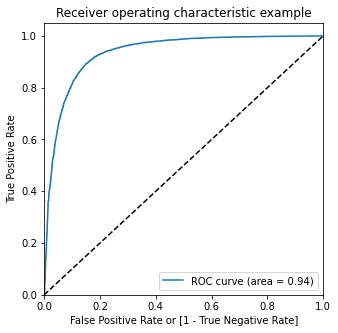

In [164]:
fpr, tpr, thresholds = roc_curve( y_train_lm4_df['Churn'], y_train_lm4_df['Churn_Prob'], drop_intermediate = False )
draw_roc(y_train_lm4_df['Churn'], y_train_lm4_df['Churn_Prob'])
plt.show()

In [165]:
X_test_lm4 = X_test_pt.copy()

In [166]:
lm4_col = [i for i in X_train_ftr.columns]
lm4_col.remove('const')
X_test_lm4 = X_test_lm4[lm4_col]

In [167]:
X_test_lm4 = stm.add_constant(X_test_lm4)

In [168]:
# Predict on the test set
y_test_lm4 = lm4.predict(X_test_lm4)

In [169]:
y_test_lm4_df = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_lm4})
y_test_lm4_df['CustID'] = y_test.index
y_test_lm4_df.head()

,Churn,Churn_Prob,CustID
0,0,0.260089,65159
1,0,0.043866,11310
2,0,0.005159,53689
3,0,0.611108,36799
4,0,0.114583,15526


In [170]:
y_test_lm4_df['Pred'] = y_test_lm4_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_lm4_df.head()

,Churn,Churn_Prob,CustID,Pred
0,0,0.260089,65159,0
1,0,0.043866,11310,0
2,0,0.005159,53689,0
3,0,0.611108,36799,1
4,0,0.114583,15526,0


In [171]:
# Confusion matrix 
confusion = confusion_matrix(y_test_lm4_df['Churn'], y_test_lm4_df['Pred'])
print(confusion)

[[4870  844]
 [  95  426]]


In [172]:
# Let's check the overall accuracy.
print('Accuracy of the Logistic Model for Test data: ', accuracy_score(y_test_lm4_df['Churn'], y_test_lm4_df['Pred']))
print('Recall of the Logistic Model for Test data: ', recall_score(y_test_lm4_df['Churn'], y_test_lm4_df['Pred']))

Accuracy of the Logistic Model for Test data:  0.8493985565356856
Recall of the Logistic Model for Test data:  0.817658349328215


So we can can see that for the Logistic Regression without PCA, we get an accuracy of **86%** and on the test data it is **84%**. This shows that the model is performing well in terms of decision making.

## Predictor summary:

In [173]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26660
Model:                            GLM   Df Residuals:                    26647
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8603.8
Date:                Wed, 26 Jan 2022   Deviance:                       17208.
Time:                        08:42:51   Pearson chi2:                 3.45e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1147      0.021     -5.479      0.000      -0.156      -0.074
onnet_mou_7                 0.4700      0.040     11.683      0.000       0.391       0.549
onnet_mou_8                -0.3364      0.044     -7.652      0.000      -0.423      -0.250
offnet_mou_7                0.3080      0.037      8.420      0.000       0.236       0.380
offnet_mou_8               -0.2795      0.044     -6.330      0.000      -0.366      -0.193
roam_og_mou_8               0.7847      0.022     36.228      0.000       0.742       0.827
loc_ic_t2t_mou_6            0.1375      0.029      4.766      0.000       0.081       0.194
loc_ic_t2m_mou_6            0.1030      0.031      3.371      0.001       0.043       0.163
total_ic_mou_8             -1.3562      0.037    -36.605      0.000      -1.429      -1.284
last_day_rch_amt_8         -0.6291      0.022    -28.919      0.000      -0.672      -0.587
count_rech_2g_8            -1.1704      0.060    -19.515      0.000      -1.288      -1.053
sachet_2g_8                 0.7906      0.057     13.781      0.000       0.678       0.903
day_date_of_last_rech_8    -0.9958      0.024    -40.941      0.000      -1.043      -0.948
===========================================================================================
"""

## Key Findings / Recommendations:

We can conclude the following from the above model:
- The consumers who use 2G network with sachet recharge are most likely to Churn
- The customers who recharge late in a month are like to Churn than the ones who recharge on the beginning of the month
- Both for inter-operator and intra-operator calls, customers who are calling less, are more likely to churn
- Most cases of roaming customers who avail outgoing calls are likely to Churn
- If the count of recharges are decreasing for a customer, it is likely that the customer will Churn